# Frogtown/Saint Paul Traffic Stop Report 
## By Abu Nayeem (04/05/19)

**Purpose:**

I will be looking into the Traffic Stop Data for Saint Paul, Minnesota (USA) from the Saint Paul Police Department (SPPD) to determine if there is any evidence suggesting racial bias involving traffic enforcement and find other insights from the data. The tension between law enforcement and the community has been intense after several prolific shootings that have occured within the last couple of years. 

**About the Dataset:**

The dataset contains traffic stop collected by the Saint Paul police department from 2000 to 2018 and can be accessed [here](https://information.stpaul.gov/Public-Safety/Traffic-Stop-Dataset/kkd6-vvns). The website have a lot of features and visualizations; However it is clunky for every day users and data transformations are limited. I have chosen to select years from 2017 to 2018 because a 'reason' for stopping a driver was provided. So the analysis will be relevant.

The dataset consist of each record of driver being stopped, but the locations coordinates are limited to the police grid coordinates. There is maybe over 90 or so police grids. 

![title](policegrid.png)

# Thomas-Frogtown Neighborhood

I'm a resident of Frogtown and it is a lower-income community. I would like to use to display these results to community members and respective community members. Here are some snapshots of the community. Plots exported from [Minnesota Compass](https://www.mncompass.org/profiles/neighborhoods/st-paul/frogtown-thomas-dale)

![title](fgAge1.png)

![title](fgInc1.png)



# Data Prep/ Load

In [277]:
#setup
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import plotly

#Data Load
df = pd.read_csv('Traffic_Stop_Dataset.csv')

#More familar column names Column Names
cols= ['Year','Date','Race','Gender','Driver_search','Vehicle_search','Citation','Age','Reason','Grid','GridLocation', 'Count']
df.columns= cols

#We will be choosing from 2017 to 2018 because there a reason given for traffic stop
df= df.query('Year in [2018,2017]')
df.head()

{
    "tags": [
        "hidecode",
    ]
}

SyntaxError: invalid syntax (<ipython-input-277-d8bf81df4303>, line 5)

First, I will be creating some **functions** that will make data transformations easier; these include creating an AgeBin, Neighborhood designation, and Policing District Designation

In [243]:
#COmmunity function

def commun(x): 
    if x in [67,68,87,88,89,90,91,92]:
        return 'Thomas-Frogtown'
    elif x in [5,6,7,8,25,26,27,28,45,46,47,48]:
        return 'Como'
    elif x in [107, 108, 109, 110,127,128,129,130]: 
        return 'Summit-University'
    elif x in [101,102,103,104,105,106,122,123,124,125,126]: 
        return 'Union Park'
    elif x in [63,64,65,66,83,84,85,86]: 
        return 'Midway' 
    elif x in [142,143,144,145,146,162,163,164,165,166]:
        return 'Macalester_Groveland'
    elif x in [182,183,184,185,186,202,203,204,205,206,223,224,225,242,243,244,245,246]:
        return 'Highland Park'
    elif x in [147,148,149,167,168]:
        return 'Summit Hill'
    elif x in [1,2,21,22,43,44,61,62,81,82]:
        return 'St. Anthony'
    elif x in [226,207,187,188,189,267,268,169,170,171,249,150,151,230]:
        return 'West 7th'
    elif x in [209,210,211,212,213,214,215,192,193,194,195,172,173,174,175]:
        return 'West Side'
    elif x in [111,112,131,132,133,152,153]:
        return 'Capital_River'
    elif x in [98,99,100,118,119,119,120,137,138,139,140,160,197,180,200,240,280]:
        return 'Battle_Creek'
    elif x in [76,95,96,97,115,116,117,138,114,136]:
        return 'Dayton Bluff' 
    elif x in [9,10,11,12,29,30,31,32,49,50,51,52,269,69,70,71,72]:
        return 'North End'
    elif x in [13,14,15,16,33,34,35,36,53,54,55,56,73,74,75,93,94]:
        return 'Payne-Phalen'
    elif x in [17,18,19,20,37,38,39,40,56,57,58,59,60,77,78,79,80]:
        return 'Greater East Side'
    else: 
        return 'NaN'

#District Function    
    
def district(x):
    if x in [1,2,3,4,5,6,7,8,21,22,23,24,25,26,27,28,43,44,45,46,47,48,\
            61,62,63,64,65,66,67,68,269,81,82,83,84,85,86,87,88,89,\
            101,102,103,104,105,106,107,108,109,110,122,123,124,125,126,\
            127,128,129,130,142,143,144,145,146,147,148,149,149,\
            162,163,164,165,166,167,168,182,183,184,185,186,\
            202,203,204,205,206,223,224,225,242,243,244,245,246]:
        return 'Western'
    elif x in [9,10,11,12,29,30,32,31,49,50,51,52,69,70,71,72,\
              90,91,92,111,112,131,132,133,267,268,249,130,230,\
              150,151,152,153,169,170,171,172,173,174,175,207,209,226,\
              187,188,189,192,193,194,195,210,211,212,213,214,215]:
        return 'Central'
    elif x in [13,14,15,16,17,18,19,20,33,34,35,36,37,38,39,40,\
              53,54,55,56,57,58,59,60,73,74,75,76,77,78,79,80,\
              93,94,95,96,97,98,99,100,114,115,116,117,118,119,120,\
              136,137,138,139,140,160,197,180,200,240,280]:
        return 'Eastern'
    else:
        return 'NaN'
    
# Define Age Function bins
def agef(x):
    if x<19: 
        return 'Teen <19'
    elif x>18 and x<25: 
        return 'Young Adult 19-24'
    elif x>25 and x<31: 
        return 'Adult 26-30'
    elif x>30 and x<46: 
        return 'Middle Adult 31-45' 
    elif x>45: 
        return 'Older Adult 46+' 
    else: 
        return 'NaN'    
    
    
    

# Data Cleaning/Wrangling

I will be constructing several variables. Originally, I wanted to extract gridlocation coordinates from the dataset, but it makes more sense to connect the grid to a json file. The manipulations and additions are listed below:

1. Convert time variable to datetime; Extract Month, DayofWeek, Weekend, Hour
2. I've constructed a variable **LateNight** which denotes if a stop occured between 10:00PM to 5:00AM
3. Converted several variables to integers; Note: Female is designated as 1  
4. Converted some descriptive columns to dummy variables

**Initial Omissions**

1. The demographic 'Native American' was excluded because the numbers were too small and it would create problems with coding as the current code has not been automated
2. There are empty cells under the 'No Data' Category
3. The two reasons, '911 call', and 'Investigative Stop' were excluded because they were small numbers and not relevant to study 
4. Finally, any data entries not belonging to a community were excluded. It's possible that some stops occured outside Saint Paul jursidence. These data points were excluded

**Other Initial Insights**

1. More than 1/3 of stops occured late night
2. Driver being search and vehicle being searched is strongly correlated, so not included in exploratory analysis

In [247]:
#Add District Plannning Council and District columns from Functions
df['Community']= df['Grid'].apply(commun)
df['District']= df['Grid'].apply(district)
df['AgeDemo']= df['Age'].apply(agef)

#Add Time Variables
df['Date']= pd.to_datetime(df['Date'])
df['DayofWeek']=df['Date'].dt.dayofweek
df['Weekend'] = df['DayofWeek'].apply(lambda x: 1 if (x>4)  else 0)
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df['LateNight'] = df['Hour'].apply(lambda x: 1 if (x>21 or x<5)  else 0)

#Screening
df= df[df.Reason != '911 Call / Citizen Reported']
df= df[df.Reason != 'No Data']
df= df.loc[df['Reason'] != 'Investigative Stop']
df= df.loc[df['Race'] != 'Native American']

#Replace variables with dummies
df['Driver_search'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True) 
df['Vehicle_search'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True) 
df['Citation'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True) 
df['Gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True) #FEMALE is 1
df= pd.concat([df,pd.get_dummies(df['Reason'])], axis=1)
df= pd.concat([df,pd.get_dummies(df['Race'])], axis=1)

#df[['Dr_search', 'V_search',  'Citation']] = df[['Dr_search', 'V_search', 'Gender','Citation']].astype(int)

# Remove any missing community data entries
df= df[df.Community != 'NaN']



# Data Exploration

There are many ways to explore the dataset, but I'll primarly focusing on the racial distibutions. For this reason, I've created a **master table** that collects the groupby values. As you see the code below, there is a lot of repetition. I have not constructed an efficient loop method. 

In general, I'm creating a massive table, where it will be filled by several values. Here are a few things to note:

* **'Eq'** stands for Equipment; and **'Mov'** indicates Moving Violation

* Most of the values are normalized from [0 to 1] and conditioned on Racial identity; 

How to read results:

* Eq_Margin of the Asian group indicates the percentage 'Equipment Violation' respect to all stops conditioned on Asian People. So a value 0.24 would indicate that 24% of stops for Asians were for Equipment Violations.

* Eq_Citation for Asian indicates the percentage of Equipment citations respect to all instance conditioned on being stopped for Equipment Violation and Asian. So a value of 0.4 indicates that 40% of equipment violations for Asians led to a citation.

* Mov_DriverSearch of 0.15 for Asians indicates that 15% of Asian drivers were searched during a Moving Violation conditioned on being Asian

* Mov_Gender_F of 0.55 for Asians indicates that 55% of Asian women are stopped for Moving Violations conditioned on being women.

* Eq_LateNight of 0.25 for Asians indicate that 25% of Asian drivers are stopped for Equipment Violation during latenight conditioned on being Asian

* Morn_Citation of 0.2 for Asians indicate that 20% of Asian drivers recieved during the daytime conditioned of being Asian


# Data Prep

Data Prior to 2017 does not provide a reason why a vehicle has been stopped, so not used

In [248]:
#Empty Data table setup
data = [['Asian',15,15,15,0.5,0.5,10,0.5,0.5,10,0.5,0.5,0.5,0.5,10,0.5,0.5,0.5,0.5],\
        ['Black', 15,15,15,0.5,0.5,10,0.5,0.5,10,0.5,0.5,0.5,0.5,10,0.5,0.5,0.5,0.5],\
        ['Latino', 15,15,15,0.5,0.5,10,0.5,0.5,10,0.5,0.5,0.5,0.5,10,0.5,0.5,0.5,0.5],\
        ['Other', 15,15,15,0.5,0.5,10,0.5,0.5,10,0.5,0.5,0.5,0.5,10,0.5,0.5,0.5,0.5],\
       ['White',15,15,15,0.5,0.5,10,0.5,0.5,10,0.5,0.5,0.5,0.5,10,0.5,0.5,0.5,0.5]] 

Race_Grp = pd.DataFrame(data, columns= ['Race','Tot_Count','Eq_Count','Mov_Count','Eq_Margin','Mov_Margin','Citation_Count','Eq_Citation',\
                                      'Mov_Citation','Driversearch_Count','Eq_DriverSearch','Mov_DriverSearch',\
                                      'Eq_Gender_F','Mov_Gender_F','LateNight_Count','Eq_LateNight','Mov_LateNight',\
                                      'Morn_Citation','Late_Citation'])

Race_Grp.set_index('Race', inplace=True)

#Specify Frogtown
rf=df.query("Community=='Thomas-Frogtown'")


In [249]:

#Long Strect of code

#Programmer Note: The sort index made the values of the output easier to predice to allow more predictable results

#Group by Race to get count
A=round(rf['Race'].value_counts().sort_index(level=1),4)
Race_Grp.set_value('Asian','Tot_Count', A[0])
Race_Grp.set_value('Black','Tot_Count', A[1])
Race_Grp.set_value('Latino','Tot_Count', A[2])
Race_Grp.set_value('Other','Tot_Count', A[3])
Race_Grp.set_value('White','Tot_Count', A[4])

#Group by Race and Reason to get counts
A= round(rf.groupby(['Race'])['Reason'].value_counts().sort_index(level=1),4)
Race_Grp.set_value('Asian','Eq_Count', A[0])
Race_Grp.set_value('Black','Eq_Count', A[1])
Race_Grp.set_value('Latino','Eq_Count', A[2])
Race_Grp.set_value('Other','Eq_Count', A[3])
Race_Grp.set_value('White','Eq_Count', A[4])
Race_Grp.set_value('Asian','Mov_Count', A[5])
Race_Grp.set_value('Black','Mov_Count', A[6])
Race_Grp.set_value('Latino','Mov_Count', A[7])
Race_Grp.set_value('Other','Mov_Count', A[8])
Race_Grp.set_value('White','Mov_Count', A[9])

#Group by Race and Reason but normalized counts
A= round(rf.groupby(['Race'])['Reason'].value_counts(normalize=True).sort_index(level=1),4)
Race_Grp.set_value('Asian','Eq_Margin', A[0])
Race_Grp.set_value('Black','Eq_Margin', A[1])
Race_Grp.set_value('Latino','Eq_Margin', A[2])
Race_Grp.set_value('Other','Eq_Margin', A[3])
Race_Grp.set_value('White','Eq_Margin', A[4])
Race_Grp.set_value('Asian','Mov_Margin', A[5])
Race_Grp.set_value('Black','Mov_Margin', A[6])
Race_Grp.set_value('Latino','Mov_Margin', A[7])
Race_Grp.set_value('Other','Mov_Margin', A[8])
Race_Grp.set_value('White','Mov_Margin', A[9])

#Group by Race and Citation Counts
A=round(rf.groupby(['Race'])['Citation'].value_counts().sort_index(level=1),4)
Race_Grp.set_value('Asian','Citation_Count', A[5])
Race_Grp.set_value('Black','Citation_Count', A[6])
Race_Grp.set_value('Latino','Citation_Count', A[7])
Race_Grp.set_value('Other','Citation_Count', A[8])
Race_Grp.set_value('White','Citation_Count', A[9])

#Group by Race, Reason, and Citation Normalized Counts
A= round(rf.groupby(['Race','Reason'])['Citation'].value_counts(normalize=True).sort_index(level=2),4)
Race_Grp.set_value('Asian','Eq_Citation', A[10])
Race_Grp.set_value('Black','Eq_Citation', A[12])
Race_Grp.set_value('Latino','Eq_Citation', A[14])
Race_Grp.set_value('Other','Eq_Citation', A[16])
Race_Grp.set_value('White','Eq_Citation', A[18])
Race_Grp.set_value('Asian','Mov_Citation', A[11])
Race_Grp.set_value('Black','Mov_Citation', A[13])
Race_Grp.set_value('Latino','Mov_Citation', A[15])
Race_Grp.set_value('Other','Mov_Citation', A[17])
Race_Grp.set_value('White','Mov_Citation', A[19])

#Group by Race and Search Counts
A=round(rf.groupby(['Race'])['Driver_search'].value_counts().sort_index(level=1),4)
Race_Grp.set_value('Asian','Driversearch_Count', A[5])
Race_Grp.set_value('Black','Driversearch_Count', A[6])
Race_Grp.set_value('Latino','Driversearch_Count', A[7])
Race_Grp.set_value('Other','Driversearch_Count', A[8])
Race_Grp.set_value('White','Driversearch_Count', A[9])

#Group by Race and Citation Counts
A= round(rf.groupby(['Race','Reason'])['Driver_search'].value_counts(normalize=True).sort_index(level=2),4)
Race_Grp.set_value('Asian','Eq_DriverSearch', A[10])
Race_Grp.set_value('Black','Eq_DriverSearch', A[12])
Race_Grp.set_value('Latino','Eq_DriverSearch', A[14])
Race_Grp.set_value('Other','Eq_DriverSearch', A[16])
Race_Grp.set_value('White','Eq_DriverSearch', A[18])
Race_Grp.set_value('Asian','Mov_DriverSearch', A[11])
Race_Grp.set_value('Black','Mov_DriverSearch', A[13])
Race_Grp.set_value('Latino','Mov_DriverSearch', A[15])
Race_Grp.set_value('Other','Mov_DriverSearch', A[17])
Race_Grp.set_value('White','Mov_DriverSearch', A[19])

#Group by Race,Reason, and Gender Normalized Counts
A=round(rf.groupby(['Race','Reason'])['Gender'].value_counts(normalize=True).sort_index(level=2),4)
Race_Grp.set_value('Asian','Eq_Gender_F', A[10])
Race_Grp.set_value('Black','Eq_Gender_F', A[12])
Race_Grp.set_value('Latino','Eq_Gender_F', A[14])
Race_Grp.set_value('Other','Eq_Gender_F', A[16])
Race_Grp.set_value('White','Eq_Gender_F', A[18])
Race_Grp.set_value('Asian','Mov_Gender_F', A[11])
Race_Grp.set_value('Black','Mov_Gender_F', A[13])
Race_Grp.set_value('Latino','Mov_Gender_F', A[15])
Race_Grp.set_value('Other','Mov_Gender_F', A[17])
Race_Grp.set_value('White','Mov_Gender_F', A[19])

#Group by Race,LateNight Counts
A=round(rf.groupby(['Race'])['LateNight'].value_counts().sort_index(level=1),4)
Race_Grp.set_value('Asian','LateNight_Count', A[5])
Race_Grp.set_value('Black','LateNight_Count', A[6])
Race_Grp.set_value('Latino','LateNight_Count', A[7])
Race_Grp.set_value('Other','LateNight_Count', A[8])
Race_Grp.set_value('White','LateNight_Count', A[9])

#Group by Race,Reason, and Latenight Normalized Counts
A=round(rf.groupby(['Race','Reason'])['LateNight'].value_counts(normalize=True).sort_index(level=2),4)
Race_Grp.set_value('Asian','Eq_LateNight', A[10])
Race_Grp.set_value('Black','Eq_LateNight', A[12])
Race_Grp.set_value('Latino','Eq_LateNight', A[14])
Race_Grp.set_value('Other','Eq_LateNight', A[16])
Race_Grp.set_value('White','Eq_LateNight', A[18])
Race_Grp.set_value('Asian','Mov_LateNight', A[11])
Race_Grp.set_value('Black','Mov_LateNight', A[13])
Race_Grp.set_value('Latino','Mov_LateNight', A[15])
Race_Grp.set_value('Other','Mov_LateNight', A[17])
Race_Grp.set_value('White','Mov_LateNight', A[19])

#Group by Race,Latenight, and Citation Normalized Counts
#1/3 of data is done during latenight activities
A=round(rf.groupby(['Race','LateNight'])['Citation'].value_counts(normalize=True).sort_index(level=2),4)
Race_Grp.set_value('Asian','Morn_Citation', A[10])
Race_Grp.set_value('Black','Morn_Citation', A[12])
Race_Grp.set_value('Latino','Morn_Citation', A[14])
Race_Grp.set_value('Other','Morn_Citation', A[16])
Race_Grp.set_value('White','Morn_Citation', A[18])
Race_Grp.set_value('Asian','Late_Citation', A[11])
Race_Grp.set_value('Black','Late_Citation', A[13])
Race_Grp.set_value('Latino','Late_Citation', A[15])
Race_Grp.set_value('Other','Late_Citation', A[17])
Race_Grp.set_value('White','Late_Citation', A[19])


,Tot_Count,Eq_Count,Mov_Count,Eq_Margin,Mov_Margin,Citation_Count,Eq_Citation,Mov_Citation,Driversearch_Count,Eq_DriverSearch,Mov_DriverSearch,Eq_Gender_F,Mov_Gender_F,LateNight_Count,Eq_LateNight,Mov_LateNight,Morn_Citation,Late_Citation
Race,,,,,,,,,,,,,,,,,,
Asian,687,162,525,0.2358,0.7642,311,0.2531,0.5143,30,0.0556,0.0400,0.2346,0.3390,216,0.5062,0.2552,0.5541,0.2315
Black,2687,971,1716,0.3614,0.6386,911,0.2194,0.4068,379,0.1514,0.1352,0.3110,0.3240,1271,0.5778,0.4138,0.4710,0.1920
Latino,238,80,158,0.3361,0.6639,100,0.1875,0.5380,21,0.1375,0.0633,0.3375,0.2911,82,0.4875,0.2722,0.5192,0.2317
Other,360,95,265,0.2639,0.7361,135,0.2421,0.4226,22,0.0632,0.0604,0.3895,0.3321,144,0.5684,0.3396,0.4815,0.2153
White,1486,346,1140,0.2328,0.7672,762,0.1908,0.6105,97,0.1243,0.0474,0.3555,0.4018,444,0.5549,0.2211,0.6440,0.2050


**Insights**

Recall in Frogtown the racial distribution is 1/3 Black, 1/3 Asian, and 1/5 white. With that said there is greater proportion of both Black and White drivers being stopped.

* Blacks were stopped the most and by proportion have greater likelihood of being stopped for equipment violation ( 
* Asians were stopped less respect to their proportional population
* Blacks were less likely to recieve citations despite being pulled over frequently
* White drivers were more likely to recieve a citation for moving violations compared to other groups
* Black drivers are searched much often than their peers despite low citations count
* Female drivers via proportion are less likely to be stopped; though white females have the highest proportion
* There are considerably more Equipment violations during latenight than in the morning and less Moving Violations
* The citation rates are much higher during the daytime vs the nighttime. This makes sense because there is less drivers during late night. Though 1/3 of stops occur during latenight.  


Please view the plots below to give a visual representation of some of the calculations


# Plotting 

Race                Asian  Black  Latino  Other  White
Tot_Count             687   2687     238    360   1486
Eq_Count              162    971      80     95    346
Mov_Count             525   1716     158    265   1140
LateNight_Count       216   1271      82    144    444
Citation_Count        311    911     100    135    762
Driversearch_Count     30    379      21     22     97


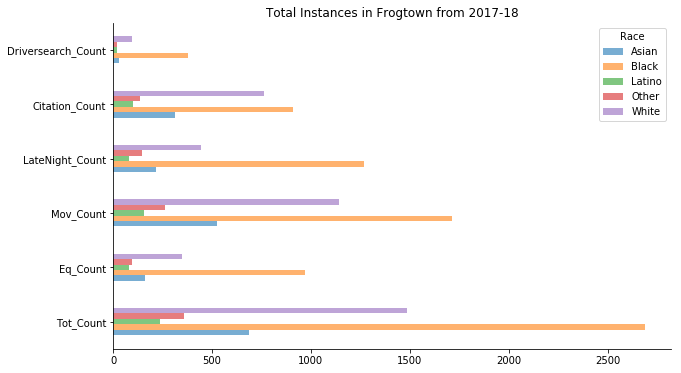

In [250]:
# Graph Based on Counts

#Select Features
Features= ['Tot_Count','Eq_Count', 'Mov_Count','LateNight_Count', 'Citation_Count','Driversearch_Count']
df_t= Race_Grp[Features]
df_t = df_t.transpose()
print(df_t)

#Plotting
ax= df_t.plot(kind='barh', figsize=(10, 6),alpha= 0.6)


plt.title('Total Instances in Frogtown from 2017-18')
plt.ylabel('')
plt.xlabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Race              Asian   Black  Latino   Other   White
Eq_Margin        0.2358  0.3614  0.3361  0.2639  0.2328
Eq_LateNight     0.5062  0.5778  0.4875  0.5684  0.5549
Eq_Citation      0.2531  0.2194  0.1875  0.2421  0.1908
Eq_DriverSearch  0.0556  0.1514  0.1375  0.0632  0.1243
Eq_Gender_F      0.2346  0.3110  0.3375  0.3895  0.3555


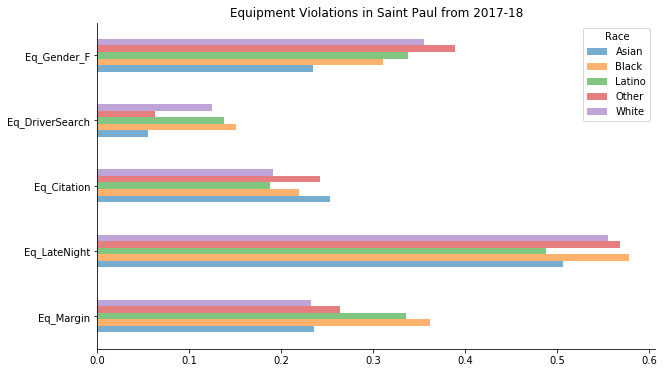

In [56]:
# Graph on Equipment Violations

#Select Features
Features= ['Eq_Margin','Eq_LateNight','Eq_Citation','Eq_DriverSearch','Eq_Gender_F']
df_t= Race_Grp[Features]
df_t = df_t.transpose()
print(df_t)

#Plotting
ax=df_t.plot(kind='barh', figsize=(10, 6),alpha= 0.6)

plt.title('Equipment Violations in Frogtown from 2017-18')
plt.ylabel('')
plt.xlabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Race               Asian   Black  Latino   Other   White
Mov_Margin        0.7642  0.6386  0.6639  0.7361  0.7672
Mov_Citation      0.5143  0.4068  0.5380  0.4226  0.6105
Mov_DriverSearch  0.0400  0.1352  0.0633  0.0604  0.0474
Mov_Gender_F      0.3390  0.3240  0.2911  0.3321  0.4018
Mov_LateNight     0.2552  0.4138  0.2722  0.3396  0.2211


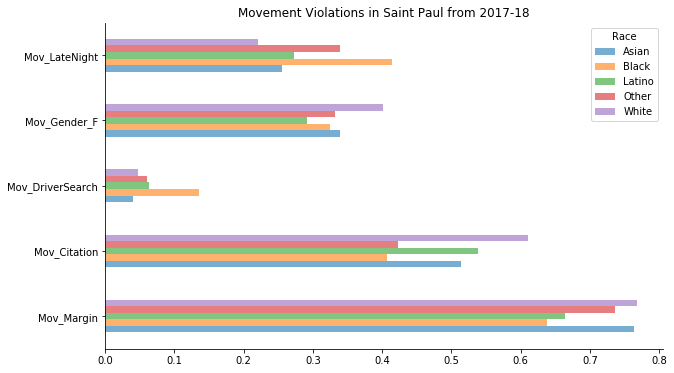

In [254]:
# Graph Based on Movement Violations

#Select Features
Features= ['Mov_Margin','Mov_Citation','Mov_DriverSearch','Mov_Gender_F','Mov_LateNight' ]
df_t= Race_Grp[Features]
df_t = df_t.transpose()
print(df_t)

#Plotting
ax=df_t.plot(kind='barh', figsize=(10, 6),alpha= 0.6)

plt.title('Movement Violations in Saint Paul from 2017-18')
plt.ylabel('')
plt.xlabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

Race            Asian  Black  Latino   Other  White
Morn_Citation  0.5541  0.471  0.5192  0.4815  0.644
Late_Citation  0.2315  0.192  0.2317  0.2153  0.205


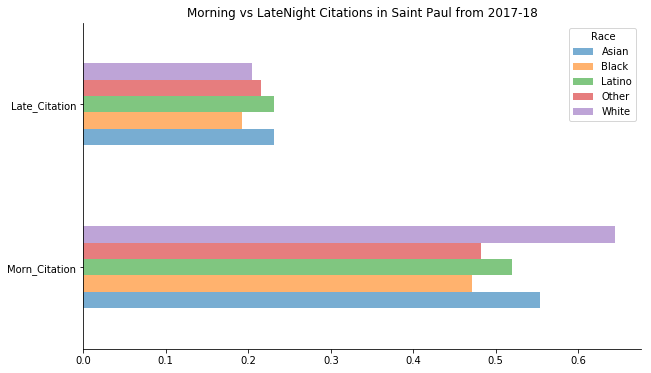

In [58]:
# Graph Based on Morning and Latenight Citations

#Select Features
Features= ['Morn_Citation','Late_Citation']
df_t= Race_Grp[Features]
df_t = df_t.transpose()
print(df_t)

#Plotting
ax=df_t.plot(kind='barh', figsize=(10, 6),alpha= 0.6)

plt.title('Morning vs LateNight Citations in Saint Paul from 2017-18')
plt.ylabel('')
plt.xlabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

The strategy to measure values of the impact of time variables is to aggregate by the time variable and since time is a continous variable, a line graph is used. Furthermore, the strategy in mapping involves finding the variables of interest uses the aggregate sum function and then dividing the count to standardize it. 

           Count  LateNight
DayofWeek                  
0            742        243
1            864        291
2            974        292
3            914        329
4            745        357
5            683        371
6            536        274


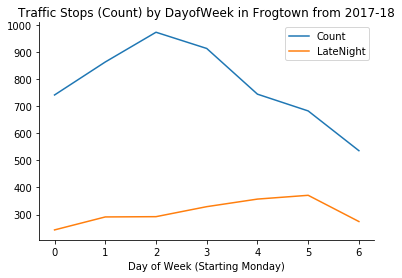

In [255]:
#Traffic Stops by Day of Week (Count)

Features= ['Count','LateNight','DayofWeek']
B= rf[Features].groupby(['DayofWeek']).sum()  #group by Function

print(B)
ax=B.plot(kind='line')

plt.title('Traffic Stops (Count) by DayofWeek in Frogtown from 2017-18')
plt.ylabel('')
plt.xlabel('Day of Week (Starting Monday)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

           Citation  Equipment Violation  Moving Violation  LateNight
DayofWeek                                                            
0          0.509434             0.234501          0.765499   0.327493
1          0.434028             0.307870          0.692130   0.336806
2          0.493840             0.258727          0.741273   0.299795
3          0.431072             0.275711          0.724289   0.359956
4          0.306040             0.353020          0.646980   0.479195
5          0.303075             0.374817          0.625183   0.543192
6          0.291045             0.356343          0.643657   0.511194


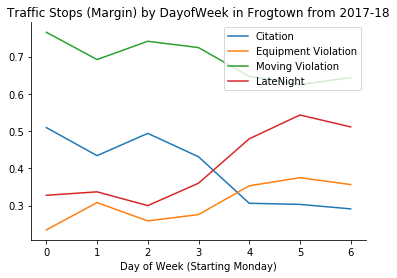

In [256]:
#Traffic Stops by Day of Week

Features= ['Count','Citation','Equipment Violation','Moving Violation','LateNight','DayofWeek']
B= rf[Features].groupby(['DayofWeek']).sum()  #group by Function
B=B.div(B['Count'].values,axis=0) #divide by count to get normalization
B.drop(B.columns[[0]], axis=1, inplace=True) #drop first group

print(B)
ax=B.plot(kind='line')

plt.title('Traffic Stops (Margin) by DayofWeek in Frogtown from 2017-18')
plt.ylabel('')
plt.xlabel('Day of Week (Starting Monday)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

* The traffic stops are most frequent on Tuesday and less on the weekend
* Late Night traffic stops increases on the weekend days includes Friday (makes sense)
* There seems to be strong correlation between moving violation and number of citations
* There seems to be strong correlation between equipment violation and latenight traffic stops
* Less citations by proportion is less during the weekend

       Count  LateNight
Month                  
1        392        129
2        432        174
3        609        257
4        638        230
5        502        226
6        428        192
7        540        196
8        483        120
9        335        119
10       312        139
11       385        187
12       402        188


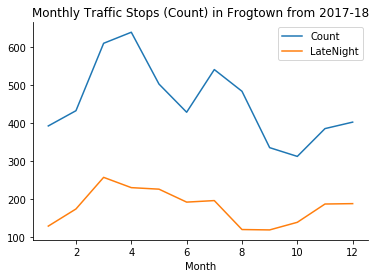

In [257]:
#Traffic Stops by Month

Features= ['Count', 'LateNight','Month']
B= rf[Features].groupby(['Month']).sum()

print(B)
ax=B.plot(kind='line')

plt.title('Monthly Traffic Stops (Count) in Frogtown from 2017-18')
plt.ylabel('')
plt.xlabel('Month')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

       Citation  Equipment Violation  Moving Violation  LateNight
Month                                                            
1      0.415816             0.321429          0.678571   0.329082
2      0.356481             0.335648          0.664352   0.402778
3      0.367816             0.338259          0.661741   0.422003
4      0.487461             0.318182          0.681818   0.360502
5      0.362550             0.272908          0.727092   0.450199
6      0.429907             0.320093          0.679907   0.448598
7      0.524074             0.240741          0.759259   0.362963
8      0.532091             0.196687          0.803313   0.248447
9      0.441791             0.319403          0.680597   0.355224
10     0.326923             0.349359          0.650641   0.445513
11     0.270130             0.309091          0.690909   0.485714
12     0.266169             0.348259          0.651741   0.467662


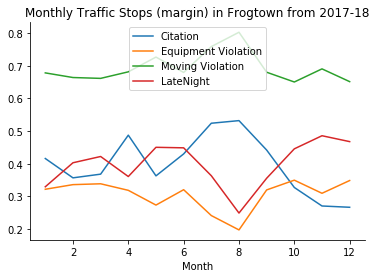

In [258]:
#Traffic Stops by Month

Features= ['Count','Citation','Equipment Violation','Moving Violation','LateNight','Month']
B= rf[Features].groupby(['Month']).sum()
B=B.div(B['Count'].values,axis=0)
B.drop(B.columns[[0]], axis=1, inplace=True)

print(B)
ax=B.plot(kind='line')

plt.title('Monthly Traffic Stops (margin) in Frogtown from 2017-18')
plt.ylabel('')
plt.xlabel('Month')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

* There is less traffic stops during the winter months, and steadily more on Spring and Fall
* There is a significant drop on Equipment and Latenight traffic stops during the summer month
* There is an increase proportion of moving violations and citations during the summer months
* Less citiations are given Late Fall and early Winter

      Count  Driver_search
Hour                      
0       556             77
1       259             42
2       152             27
3        75             13
4        34              3
5        16              1
6         9              0
7        59              1
8       215              3
9       361              1
10      280              6
11      111              3
12       99              0
13      174              7
14      177              6
15      147              1
16      138             15
17      267             30
18      307             38
19      292             46
20      294             33
21      355             37
22      416             46
23      665            113


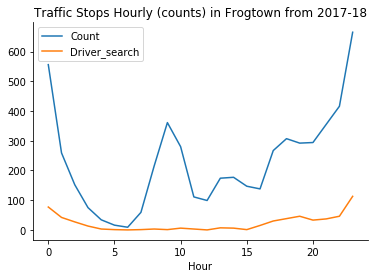

In [72]:
#Traffic Stops by Hour

Features= ['Count','Driver_search','Hour']
B= rf[Features].groupby(['Hour']).sum()
print(B)
ax= B.plot(kind='line')

plt.title('Traffic Stops Hourly (counts) in Frogtown from 2017-18')
plt.ylabel('')
plt.xlabel('Hour')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

      Citation  Equipment Violation  Moving Violation  Driver_search
Hour                                                                
0     0.188849             0.447842          0.552158       0.138489
1     0.135135             0.409266          0.590734       0.162162
2     0.177632             0.421053          0.578947       0.177632
3     0.200000             0.360000          0.640000       0.173333
4     0.117647             0.382353          0.617647       0.088235
5     0.000000             0.375000          0.625000       0.062500
6     0.555556             0.111111          0.888889       0.000000
7     0.813559             0.067797          0.932203       0.016949
8     0.790698             0.037209          0.962791       0.013953
9     0.822715             0.077562          0.922438       0.002770
10    0.842857             0.021429          0.978571       0.021429
11    0.738739             0.054054          0.945946       0.027027
12    0.767677             0.04040

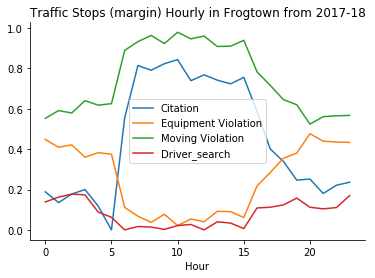

In [259]:
#Traffic Stops by Hour

Features= ['Count','Citation','Equipment Violation','Moving Violation','Driver_search','Hour']
B= rf[Features].groupby(['Hour']).sum()
B=B.div(B['Count'].values,axis=0)
B.drop(B.columns[[0]], axis=1, inplace=True)
print(B)
ax= B.plot(kind='line')

plt.title('Traffic Stops (margin) Hourly in Frogtown from 2017-18')
plt.ylabel('')
plt.xlabel('Hour')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

* There are signficiant more traffic stops during the night hours
* Moving violations during the day, Equipment violations during the night
* Very high frequency of citations during the daytime hour matched with moving violations

AgeDemo   Adult 26-30  Middle Adult 31-45  NaN  Older Adult 46+  Teen <19  \
Citation          314                 501  620              363        48   

AgeDemo   Young Adult 19-24  
Citation                373  


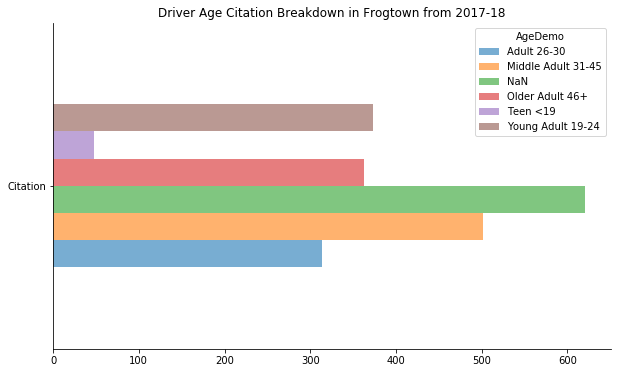

In [260]:
#Age Breakdown by Citation
#bf= rf.query("AgeDemo != 'NaN'")
Features= ['Citation','AgeDemo']
B= rf[Features].groupby(['AgeDemo']).sum()
B=B.transpose()

print(B)
ax=B.plot(kind='barh', figsize=(10, 6),alpha= 0.6)

plt.title('Driver Age Citation Breakdown in Frogtown from 2017-18')
plt.ylabel('')
plt.xlabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


When it comes to the age demographic there is just too much missing data; however there is strong correlation between getting a citation and have your age taken. Young adults recieve the most citations. 

# Geo-Graphing

The Saint Paul Police department have a [json file](https://information.stpaul.gov/Public-Safety/Saint-Paul-Police-Grid-Shapefile/ykwt-ie3e) that maps out the police grid. 

In [261]:
#import Programs
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium # map rendering library

sp_geo = r'Saint Paul Police Grid - Shapefile.geojson'

# Programmer Note: One of the challenges to get appropiate connection was to set the attribute Grid to be json value gridnum. 

In [262]:
# The graph is determined by Grid so we will group along that
Features= ['Grid','Count','Citation','Equipment Violation','Moving Violation','Driver_search','Vehicle_search','LateNight',\
          'Asian','Black','Latino','White','Other','Gender','Weekend']

B= df[Features].groupby(['Grid']).sum()
C= B['Count']
D= B['Citation']
E= B['Equipment Violation']
F= B['Moving Violation']
G= B['LateNight']
B=B.div(B['Count'].values,axis=0)
B['Count']=C 
B['Citation_count'] =D
B['Equipment Violation_count'] =E
B['Moving Violation_count'] =F
B['LateNight_count'] =G

# The GRID needs to follow exactly like the json file
B=B.reset_index()
B.Grid = B.Grid.astype(int)
B.Grid = B.Grid.astype(str)
#print(B.head())

#FROGTOWN Value
F= rf[Features].groupby(['Grid']).sum()
C= F['Count']
F=F.div(F['Count'].values,axis=0)
F['Count']=C 

# The GRID needs to follow exactly like the json file
F=F.reset_index()
F.Grid = F.Grid.astype(int)
F.Grid = F.Grid.astype(str)

Now that we have prepared the data, we can upload into a folium map. I will first Display Frogtown and then rest of Saint Paul.

# Total Traffic Incidents in Frogtown by Grid

In [264]:
#Create Frogtown GeoMap
FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")

FG_map.choropleth(
    geo_data=sp_geo,
    data=F,
    columns=['Grid','Count'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Total Traffic Stops',
    highlight= True,
    name= 'Clean Map'   
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

# Citation Margin in Frogtown by Grid

In [265]:
FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")
FG_map.choropleth(
    geo_data=sp_geo,
    data=F,
    columns=['Grid','Citation'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Citation Margin',
    highlight= True,
    name= 'Clean Map'   
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

# Equipment Violation Margin in Frogtown by Grid

In [266]:
FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")
FG_map.choropleth(
    geo_data=sp_geo,
    data=F,
    columns=['Grid','Equipment Violation'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Equipment Violation Margin',
    highlight= True,
    name= 'Clean Map'   
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

# LateNight Traffic Stop Margin in Frogtown by Grid

In [267]:
FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")
FG_map.choropleth(
    geo_data=sp_geo,
    data=F,
    columns=['Grid','LateNight'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='LateNight Stop Margin',
    highlight= True,
    name= 'Clean Map'   
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

# Driver Searched Margin In Frogtown

In [268]:
FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")
FG_map.choropleth(
    geo_data=sp_geo,
    data=F,
    columns=['Grid','Driver_search'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Driver Search Margin',
    highlight= True,
    name= 'Clean Map'   
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

## Frogtown Summary Stats

* For total incidents, high volume of incidents are around University ave around Dale
* The citation margin doesn't too high but we need to compare to neighboring grids
* The Equipment Violation density is high and located in the same high density rate
* The LateNight Stop Margin is really high in the University area and the vehicle search rate is also high

In the next section, I will be mapping ALL of Saint Paul. To make the graphs more reasonable:

* For margin specifications, a police grid must have more than 100 total traffic stops. A smaller number creates bigger imbalance
* For total counts, only grids less than 2000 traffic counts are considered. One downtown district has an incredibly large traffic count which imbalances the legend


# Total Traffic Incidents in Saint Paul by Grid

In [269]:
#Create Saint Paul Population Map
FG_map = folium.Map(location=[44.958326, -93.132926], zoom_start=12,tiles="OpenStreetMap")

C= B.query('Count < 2000')

FG_map.choropleth(
    geo_data=sp_geo,
    data=C,
    columns=['Grid','Count'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Total Traffic Stops',
    highlight= True,
    name= 'Clean Map'
    
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

# Total Citation Count in Saint Paul by Grid

In [232]:
#Create Saint Paul Population Map
FG_map = folium.Map(location=[44.958326, -93.132926], zoom_start=12,tiles="OpenStreetMap")

C= B.query('Count < 2000')

FG_map.choropleth(
    geo_data=sp_geo,
    data=C,
    columns=['Grid','Citation_count'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Citation Counts',
    highlight= True,
    name= 'Clean Map'
    
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

# Citation Margin in Saint Paul by Grid

In [233]:
#Create Saint Paul Population Map
FG_map = folium.Map(location=[44.958326, -93.132926], zoom_start=12,tiles="OpenStreetMap")

C= B.query('Count > 100')

FG_map.choropleth(
    geo_data=sp_geo,
    data=C,
    columns=['Grid','Citation'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Citation Margin',
    highlight= True,
    name= 'Clean Map'
    
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

# Equipment Violation Count in Saint Paul by Grid

In [234]:
#Create Saint Paul Population Map
FG_map = folium.Map(location=[44.958326, -93.132926], zoom_start=12,tiles="OpenStreetMap")

C= B.query('Count < 2000')

FG_map.choropleth(
    geo_data=sp_geo,
    data=C,
    columns=['Grid','Equipment Violation_count'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Total Equipment Violation Stops',
    highlight= True,
    name= 'Clean Map'
    
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

# Equipment Violation Margin in Saint Paul by Grid

In [235]:
#Create Saint Paul Population Map
FG_map = folium.Map(location=[44.958326, -93.132926], zoom_start=12,tiles="OpenStreetMap")

C= B.query('Count > 100')

FG_map.choropleth(
    geo_data=sp_geo,
    data=C,
    columns=['Grid','Equipment Violation'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Equipment Violation Margin',
    highlight= True,
    name= 'Clean Map'
    
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

# Moving Violation Count in Saint Paul by Grid

In [165]:
#Create Saint Paul Population Map
FG_map = folium.Map(location=[44.958326, -93.132926], zoom_start=12,tiles="OpenStreetMap")

C= B.query('Count < 2000')

FG_map.choropleth(
    geo_data=sp_geo,
    data=C,
    columns=['Grid','Moving Violation_count'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Total Moving Violation Counts',
    highlight= True,
    name= 'Clean Map'
    
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

# LateNight Traffic Stop Margin in Saint Paul by Grid

In [236]:
#Create Saint Paul Population Map
FG_map = folium.Map(location=[44.958326, -93.132926], zoom_start=12,tiles="OpenStreetMap")

C= B.query('Count > 100')

FG_map.choropleth(
    geo_data=sp_geo,
    data=C,
    columns=['Grid','LateNight'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='LateNight Traffic Stop Margin',
    highlight= True,
    name= 'Clean Map'
    
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

# Driver Searched Margin in Saint Paul by Grid

In [237]:
#Create Saint Paul Population Map
FG_map = folium.Map(location=[44.958326, -93.132926], zoom_start=12,tiles="OpenStreetMap")

C= B.query('Count >100')

FG_map.choropleth(
    geo_data=sp_geo,
    data=C,
    columns=['Grid','Driver_search'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Driver Search Margin',
    highlight= True,
    name= 'Clean Map'
    
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

In [ ]:
#Create Saint Paul Population Map
FG_map = folium.Map(location=[44.958326, -93.132926], zoom_start=12,tiles="OpenStreetMap")

C= B.query('Count < 2000')

FG_map.choropleth(
    geo_data=sp_geo,
    data=C,
    columns=['Grid','Equipment Violation_count'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Total Equipment Violation Stops',
    highlight= True,
    name= 'Clean Map'
    
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

**Quick Analysis**

* The Frogtown community does not have heaviest density of traffic stops, but the cluster is very apparent to nearby grids
* Despite greater frequency of traffic stops in certain areas, the margin of citations is lower
* Many lower social economic areas have more equipment violations, which is also representated by their margin
* Many drivers in lower social economic areas are searched by margin and are stopped more regularly late night



# Longitudinal Analysis

The full dataset ranges from 2001 to 2018 and has many missing components. For some years, 50% of the data collected are missing key information. The 'total count' will includes all instances of traffic stops in Frogtown even if there is missing supplmental information.

In [271]:
#Data Load
long = pd.read_csv('Traffic_Stop_Dataset.csv')

#More familar column names Column Names
cols= ['Year','Date','Race','Gender','Driver_search','Vehicle_search','Citation','Age','Reason','Grid','GridLocation', 'Count']
long.columns= cols

#Code for how much missing data

#flong=long
#flong.replace("No Data", np.nan, inplace = True)
#missval= flong.isnull()
#for column in missval.columns.values.tolist(): #shows all the missing values
#    print(column)
#    print (missval[column].value_counts())
#    print("")    


In [272]:
#Screening
long= long[long.Reason != '911 Call / Citizen Reported']
#long= long[long.Reason != 'No Data']
long= long.loc[long['Reason'] != 'Investigative Stop']
long= long.loc[long['Race'] != 'Native American']
long['Community']= long['Grid'].apply(commun)
long= long[long.Community != 'NaN']
#long= long.query("Race =='No Data'")

#Add Time Variables
long['Date']= pd.to_datetime(long['Date'])
#long['DayofWeek']=long['Date'].dt.dayofweek
#long['Weekend'] = long['DayofWeek'].apply(lambda x: 1 if (x>4)  else 0)
#long['Month'] = long['Date'].dt.month
#long['Day'] = long['Date'].dt.day
long['Hour'] = long['Date'].dt.hour
long['LateNight'] = long['Hour'].apply(lambda x: 1 if (x>21 or x<5)  else 0)


#Replace variables with dummies
long['Driver_search'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True) 
long['Vehicle_search'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True) 
long['Citation'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True) 
long['Gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True) #FEMALE is 1
#long= pd.concat([long,pd.get_dummies(long['Reason'])], axis=1)
long= pd.concat([long,pd.get_dummies(long['Race'])], axis=1)

#long[['Dr_search', 'V_search', Citation']] = long[['Dr_search', 'V_search', 'Gender','Citation']].astype(int)

# Remove any missing community data entries


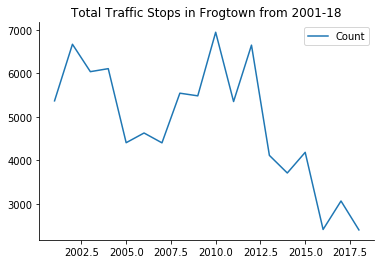

In [273]:

temp_long= long.query("Community=='Thomas-Frogtown'")
Features= ['Count','Year']
B= temp_long[Features].groupby(['Year']).sum()
ax= B.plot(kind='line')

plt.title('Total Traffic Stops in Frogtown from 2001-18')
plt.ylabel('')
plt.xlabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


The data will now be cleaned up

In [274]:
long=long.query("Race!='No Data'")
long=long.query("Driver_search !='No Data'")
long=long.query("Gender !='No Data'")
long[['Driver_search','Gender']] = long[['Driver_search', 'Gender']].astype(int)
FG_long= long.query("Community=='Thomas-Frogtown'")

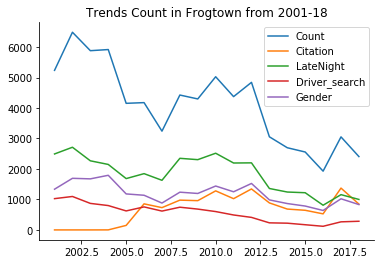

In [275]:
#Line graph COunt

Features= ['Count','Citation','LateNight','Driver_search','Gender','Year']
B= FG_long[Features].groupby(['Year']).sum()  #group by Function
#B=B.div(B['Count'].values,axis=0) #divide by count to get normalization
#B.drop(B.columns[[0]], axis=1, inplace=True) #drop first group

#print(B)
ax= B.plot(kind='line')

plt.title('Trends Count in Frogtown from 2001-18')
plt.ylabel('')
plt.xlabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


      Citation  LateNight  Driver_search    Gender
Year                                              
2001  0.000000   0.476027       0.195989  0.255205
2002  0.000000   0.418196       0.169160  0.261064
2003  0.000000   0.385544       0.147959  0.284864
2004  0.000169   0.363022       0.135035  0.302856
2005  0.035637   0.405490       0.150012  0.284373
2006  0.204741   0.442050       0.180795  0.272270
2007  0.225617   0.502469       0.190741  0.271914
2008  0.220791   0.530847       0.168362  0.279774
2009  0.223412   0.536421       0.158948  0.278334
2010  0.254925   0.500697       0.119801  0.286567
2011  0.234393   0.501944       0.112051  0.286074
2012  0.277629   0.454452       0.084900  0.314811
2013  0.290016   0.444845       0.075941  0.322422
2014  0.253709   0.461053       0.081973  0.320846
2015  0.251956   0.477308       0.066510  0.306338
2016  0.273340   0.420124       0.061722  0.330913
2017  0.449541   0.379096       0.086828  0.334535
2018  0.352037   0.415628      

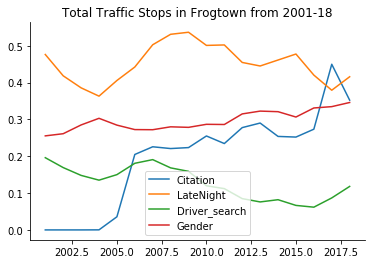

In [227]:
#Line Graph Margin

Features= ['Count','Citation','LateNight','Driver_search','Gender','Year']
B= FG_long[Features].groupby(['Year']).sum()  #group by Function
B=B.div(B['Count'].values,axis=0) #divide by count to get normalization
B.drop(B.columns[[0]], axis=1, inplace=True) #drop first group

Wprint(B)
ax= B.plot(kind='line')

plt.title('Margin Trends in Frogtown from 2001-18')
plt.ylabel('')
plt.xlabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


         Asian     Black    Latino     Other     White
Year                                                  
2001  0.124928  0.440497  0.061700  0.000000  0.372875
2002  0.134464  0.461835  0.064919  0.000000  0.338782
2003  0.138946  0.431633  0.065816  0.000000  0.363605
2004  0.137232  0.416934  0.069123  0.000000  0.376711
2005  0.154587  0.441368  0.070311  0.000000  0.333735
2006  0.159722  0.503113  0.062979  0.000000  0.274186
2007  0.137654  0.537037  0.067284  0.000000  0.258025
2008  0.134011  0.537853  0.074802  0.000000  0.253333
2009  0.127531  0.540377  0.067954  0.000000  0.264138
2010  0.140697  0.530348  0.065473  0.000000  0.263483
2011  0.134233  0.541505  0.058770  0.000000  0.265493
2012  0.139227  0.548027  0.057426  0.000000  0.255319
2013  0.145663  0.524059  0.055974  0.000000  0.274304
2014  0.124258  0.543769  0.049332  0.000000  0.282641
2015  0.118153  0.572379  0.067293  0.000000  0.242175
2016  0.129149  0.512967  0.054461  0.003112  0.300311
2017  0.11

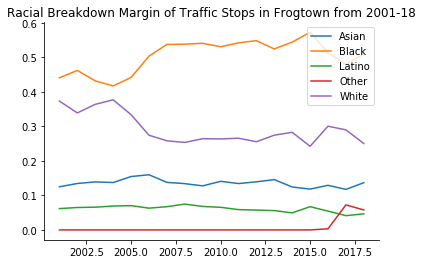

In [276]:
Features= ['Count','Asian','Black','Latino','Other','White','Year']
B= FG_long[Features].groupby(['Year']).sum()  #group by Function
B=B.div(B['Count'].values,axis=0) #divide by count to get normalization
B.drop(B.columns[[0]], axis=1, inplace=True) #drop first group

print(B)
ax= B.plot(kind='line')

plt.title('Racial Breakdown Margin of Traffic Stops in Frogtown from 2001-18')
plt.ylabel('')
plt.xlabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Preliminary Longitudinal Analysis:

* There was plenty of past data that indicate a traffic, but there was no information given.Thus the graphs presented are missing many datapoints and can provide a skewed a picture
* At around 2004 to 2005, a change of data practice/collections probably occured
* The Citation rate has increased in the last couple of years
* The racial demogrpahic of traffic stops have been steady with Blacks being overrepresentated despite some demographic shift in the neighborhood
* Driver search rate has declined

# Conclusions

There are some strong evidence suggesting racial biases especially respect to the Black community in Frogtown respect by the frequency of being stopped, searched, and lower citations. Are these biases determined locally in Frogtown and/or is this representative of other communities around Saint Paul. Other questions that should be considered what are the connection between poverty and traffic stop violations in particular equipment violations. The gender distribution of traffic stop violations were interesting as well. 

# Further Analysis: Neighborhood Geo-caching

x = ['Como','Midway']

#df.loc[df['column_name'] == some_value]
dict_stat = {}

#df.query('YEAROFSTOP in [2018]')
for j in (x):
    rf= df.loc[df['Community'] == j]  
    A=round(rf['Race'].value_counts().sort_index(level=1),4)
    Race_Grp.set_value('Asian','Tot_Count', A[0])
    Race_Grp.set_value('Black','Tot_Count', A[1])
    Race_Grp.set_value('Latino','Tot_Count', A[2])
    Race_Grp.set_value('Native American','Tot_Count', A[3])
    Race_Grp.set_value('Other','Tot_Count', A[4])
    Race_Grp.set_value('White','Tot_Count', A[5])
    
    
    
    
    "df_{}".format(j) = Race_Grp
    #dict_stat["df_{}".format(j)] = Race_Grp
    #print(Race_Grp)
    #print(i)
    #print(j)
    #y[0]= Race_Grp
    #print(Race_Grp)


    print(df_Como)  
#print(dict_stat['df_Midway'])
#print(dict_stat.keys())
